In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection,metrics,svm
from sklearn.feature_extraction.text import TfidfVectorizer
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')
import re
import string
import pickle


In [2]:
dataSet = pd.read_csv('./dataset.csv',encoding='latin', names = ['polarity','id','date','query','user','text'])
dataSet

,polarity,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [3]:
dataSet = dataSet.sample(frac=1)
dataSet = dataSet[:400000]

In [4]:
dataSet['polarity'] = dataSet['polarity'].replace(4,1)
dataSet.head()

,polarity,id,date,query,user,text
216024,0,1975614399,Sat May 30 15:31:52 PDT 2009,NO_QUERY,CreanP,Sittin at home lookin after my Sister Had a ...
142349,0,1881468983,Fri May 22 04:45:08 PDT 2009,NO_QUERY,antonettearco,why is it that things which i love to happen o...
1167872,1,1980092054,Sun May 31 05:39:27 PDT 2009,NO_QUERY,sminisapixie,@Magickk that kid only got through on sympathy...
1220025,1,1990009705,Mon Jun 01 03:34:35 PDT 2009,NO_QUERY,cobrastyle93,morning! today is day 2 of graduation practice...
476642,0,2177941256,Mon Jun 15 06:57:08 PDT 2009,NO_QUERY,pentacular,@enkeli I've tried various discs. All get chop...


In [5]:
dataSet.describe()

,polarity,id
count,400000.000000,4.000000e+05
mean,0.500058,1.998979e+09
std,0.500001,1.937261e+08
min,0.000000,1.467813e+09
25%,0.000000,1.956886e+09
50%,1.000000,2.002210e+09
75%,1.000000,2.177176e+09
max,1.000000,2.329205e+09


In [6]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400000 entries, 216024 to 121356
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   polarity  400000 non-null  int64 
 1   id        400000 non-null  int64 
 2   date      400000 non-null  object
 3   query     400000 non-null  object
 4   user      400000 non-null  object
 5   text      400000 non-null  object
dtypes: int64(2), object(4)
memory usage: 21.4+ MB


In [7]:
# check the number of positive vs. negative tagged sentences
positives = dataSet['polarity'][dataSet.polarity == 1 ]
negatives = dataSet['polarity'][dataSet.polarity == 0 ]

print('Total length of the data is:         {}'.format(dataSet.shape[0]))
print('No. of positve tagged sentences is:  {}'.format(len(positives)))
print('No. of negative tagged sentences is: {}'.format(len(negatives)))

Total length of the data is:         400000
No. of positve tagged sentences is:  200023
No. of negative tagged sentences is: 199977


In [8]:
# get a word count per of text
def word_count(words):
    return len(words.split())

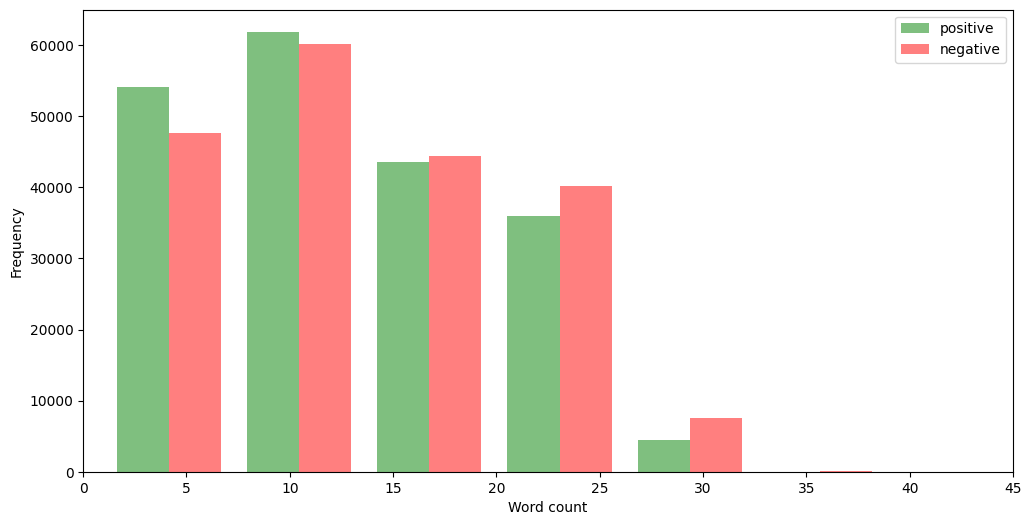

In [9]:
# plot word count distribution for both positive and negative 

dataSet['word count'] = dataSet['text'].apply(word_count)
p = dataSet['word count'][dataSet.polarity == 1]
n = dataSet['word count'][dataSet.polarity == 0]
plt.figure(figsize=(12,6))
plt.xlim(0,45)
plt.xlabel('Word count')
plt.ylabel('Frequency')
g = plt.hist([p, n], color=['g','r'], alpha=0.5, label=['positive','negative'])
plt.legend(loc='upper right')

In [10]:
# get common words in training dataset
from collections import Counter
all_words = []
for line in list(dataSet['text']):
    words = line.split()
    for word in words:
      if(len(word)>2):
        all_words.append(word.lower())
    
    
Counter(all_words).most_common(20)

[('the', 129318),
 ('and', 74278),
 ('you', 59789),
 ('for', 53504),
 ('have', 35832),
 ('that', 32250),
 ("i'm", 31965),
 ('but', 31345),
 ('just', 31171),
 ('with', 28350),
 ('was', 25907),
 ('not', 25686),
 ('this', 22053),
 ('get', 20401),
 ('good', 19441),
 ('like', 19036),
 ('are', 18881),
 ('all', 18501),
 ('out', 17377),
 ("it's", 16237)]

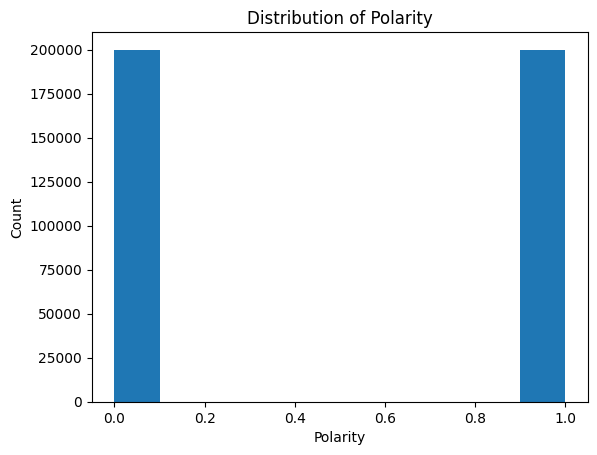

In [11]:
plt.hist(dataSet['polarity'])
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Distribution of Polarity')
plt.show()

In [12]:
# Removing the unnecessary columns.
dataSet.drop(['date','query','user','word count'], axis=1, inplace=True)

In [13]:
dataSet.drop('id', axis=1, inplace=True)

In [14]:
dataSet

,polarity,text
216024,0,Sittin at home lookin after my Sister Had a ...
142349,0,why is it that things which i love to happen o...
1167872,1,@Magickk that kid only got through on sympathy...
1220025,1,morning! today is day 2 of graduation practice...
476642,0,@enkeli I've tried various discs. All get chop...
...,...,...
802368,1,"@Flying_hei Yes, thanks - just about to get so..."
254076,0,I really should go to bed. 04:30 will be a rud...
365470,0,@WOAHAmber
1543546,1,@anniebody LOL...thanks


In [15]:
#Checking if any null values present
(dataSet.isnull().sum() / len(dataSet))*100

polarity    0.0
text        0.0
dtype: float64

In [16]:
#convrting pandas object to a string type
dataSet['text'] = dataSet['text'].astype('str')

In [17]:
nltk.download('stopwords')
stoPword = set(stopwords.words('english'))
print(stoPword)
nltk.download('punkt')
nltk.download('wordnet')

{'which', 'been', "you'll", 'her', 'shouldn', 'for', 'most', 'here', 'about', 'mustn', 'those', 'she', 'a', 'should', 'you', 'couldn', 'while', 'below', 'your', 'more', 'isn', 'out', 'each', "aren't", 'if', 'under', 's', 'will', 'm', "shan't", 'in', 'i', 'off', 'doesn', 'any', 'why', 'so', 'having', 'further', "hadn't", 'few', 'now', 'with', "she's", 'between', 'had', 'hasn', 'on', 'me', 'from', "haven't", 'just', 'after', 'y', 're', 'hadn', 'herself', 'its', 'them', 'he', 'this', 'up', 'was', 't', 'and', 'yourselves', "mightn't", 'our', 'myself', 'there', 'his', 'do', 'than', 've', 'wasn', 'have', "wasn't", 'the', 'at', 'is', 'him', 'own', 'ma', 'hers', 'my', "it's", 'above', 'against', 'their', 'ours', 'same', 'were', "shouldn't", 'of', 'd', 'll', 'are', 'we', 'themselves', 'over', 'aren', 'both', 'before', 'to', 'through', 'o', 'yourself', 'didn', 'when', "you'd", "should've", "weren't", 'these', "you're", 'then', 'that', 'other', 'again', 'can', 'they', 'himself', 'all', 'am', 'sha

[nltk_data] Downloading package stopwords to C:\Users\Hany
[nltk_data]     Medhat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Hany
[nltk_data]     Medhat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Hany
[nltk_data]     Medhat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

The Preprocessing steps taken are:

Lower Casing: Each text is converted to lowercase.
Removing URLs: Links starting with "http" or "https" or "www" are replaced by "".

Removing Usernames: Replace @Usernames with word "". (eg: "@XYZ" to "")

Removing Short Words: Words with length less than 2 are removed.
Removing Stopwords: Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. (eg: "the", "he", "have")
Lemmatizing: Lemmatization is the process of converting a word to its base form. (e.g: “wolves” to “wolf”)

In [18]:
urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern = '@[^\s]+'
def process_tweets(tweet):
  # Lower Casing
    tweet = tweet.lower()
    tweet=tweet[1:]
    # Removing all URls 
    tweet = re.sub(urlPattern,'',tweet)
    # Removing all @username.
    tweet = re.sub(userPattern,'', tweet) 
    #Remove punctuations
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    #tokenizing words
    tokens = word_tokenize(tweet)
    #Removing Stop Words
    final_tokens = [w for w in tokens if w not in stoPword]
    #reducing a word to its word stem 
    wordLemm = WordNetLemmatizer()
    finalwords=[]
    for w in final_tokens:
      if len(w)>1:
        word = wordLemm.lemmatize(w)
        finalwords.append(word)
    return ' '.join(finalwords)

In [19]:
dataSet['processed_tweets'] = dataSet['text'].apply(lambda x: process_tweets(x))
print('Text Preprocessing complete.')

Text Preprocessing complete.


In [20]:
dataSet.head(10)

,polarity,text,processed_tweets
216024,0,Sittin at home lookin after my Sister Had a ...,ittin home lookin sister great day woke super ...
142349,0,why is it that things which i love to happen o...,hy thing love happen happens people dont even ...
1167872,1,@Magickk that kid only got through on sympathy...,magickk kid got sympathy vote actually hate vo...
1220025,1,morning! today is day 2 of graduation practice...,orning today day graduation practice wed big d...
476642,0,@enkeli I've tried various discs. All get chop...,enkeli ive tried various disc get choppy respo...
476244,0,I'm REALLY sick.,really sick
667207,0,@MitsuTrackDay Thanks! It's been sold for a wh...,mitsutrackday thanks sold though
916834,1,: So wonderful to spend Mother's Day with my m...,wonderful spend mother day mum
881807,1,@_supernatural_ http://twitpic.com/4gz8j - Any...,supernatural time babe try faint seriously dud...
909364,1,is enjoying family time. Hoping to be able to ...,enjoying family time hoping able make graceful...


Word-Cloud for Positive tweets.

Vectorization and Splitting the data 

Storing input variable-processes_tweets to X and output variable-polarity to y

In [21]:
x = dataSet['processed_tweets'].values
y = dataSet['polarity'].values

In [22]:
x.shape , y.shape 

((400000,), (400000,))

Convert text to word frequency vectors

TF-IDF

This is an acronym than stands for Term Frequency – Inverse Document Frequency which are the components of the resulting scores assigned to each word.

Term Frequency: This summarizes how often a given word appears within a document.
Inverse Document Frequency: This downscales words that appear a lot across documents.

In [23]:
#Convert a collection of raw documents to a matrix of TF-IDF features.
vector = TfidfVectorizer(sublinear_tf=True)
x = vector.fit_transform(x)


In [24]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=.3,random_state=42,stratify=y)
#stratify using Classification

In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280000, 283842), (120000, 283842), (280000,), (120000,))

In [26]:
svmC=svm.SVC(kernel='linear')
svmC.fit(x_train,y_train)

SVC(kernel='linear')

In [27]:
y_pred=svmC.predict(x_test)

In [28]:
metrics.accuracy_score(y_test,y_pred)

0.7743083333333334

In [29]:
file = open('SVM.pickle','wb')
pickle.dump(svmC, file)
file.close()

In [2]:
# Open the pickle file in read-binary mode
with open('./SVM.pickle', 'rb') as f:
    # Load the object from the pickle file
    obj = pickle.load(f)

# Now you can use the loaded object
# For example, print it
print(obj)

SVC(kernel='linear')


In [ ]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print('this is accuracy = ', accuracy)